In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
from copy import deepcopy
import json
from ast import literal_eval
from scipy.interpolate import splprep, splev

import sys; sys.path.append('../../../')
from boatbuilding.panels import *

offsets = pd.read_excel('gc_draft_1_offsets.xlsx', sheet_name='points')

offsets['x'] = np.float_(offsets.x)
offsets['y'] = np.float_(offsets.y)
offsets['z'] = np.float_(offsets.z)

offsets['y'] *= 0.9
offsets['x'] *= 1.1

offsets['x'] -= offsets.x.min()

offsets['chine'].fillna('', inplace=True)

offsets['chine'] = offsets.apply(parse_chines, axis=1)

left_offsets = make_sym_offsets(offsets)

offsets = pd.concat((offsets, left_offsets), ignore_index=True)

for i, row in offsets.iterrows():
    if row.pt[-1] == 'c':
        if isinstance(row.chine, list):
            for c in row.chine:
                if c[-1] == 'r':
                    offsets.loc[i, 'chine'].append(r_to_l(c))


chine_list = []
for ch in offsets.chine:
    if isinstance(ch, str):
        if ch not in chine_list:
            chine_list.append(ch)
    elif isinstance(ch, list):
        for c in ch:
            if c not in chine_list:
                chine_list.append(c)

chine_dfs = {}
for ch in chine_list:
    chine_dfs[ch] = pd.DataFrame(columns=['x', 'y', 'z'],
                                 dtype=float)
    cd = chine_dfs[ch]
    for i, row in offsets.iterrows():
        if ch in row.chine:
            cd.loc[row.pt, :] = np.float_((row.x, row.y, row.z))
    cd.sort_values('x', inplace=True)

/Users/itchy/src/miniconda/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
../../../boatbuilding/panels.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  ldf['pt'] = [r_to_l(p) for p in ldf.pt]
../../../boatbuilding/panels.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing

In [6]:
chine_splines['c1r']

{'x': array([197.99270622, 202.77888545, 207.56206815, 212.34216807,
        217.11909896, 221.89277458, 226.66310868, 231.430015  ,
        236.19340731, 240.95319936, 245.7093049 , 250.46163768,
        255.21011145, 259.95463997, 264.69513699, 269.43151627,
        274.16369155, 278.89157659, 283.61508514, 288.33413095,
        293.04862778, 297.75849076, 302.46391336, 307.16570392,
        311.864753  , 316.56195117, 321.25817519, 325.95387998,
        330.64903106, 335.34356656, 340.03742459, 344.73054326,
        349.42286069, 354.11431499, 358.80484427, 363.49438666,
        368.18288025, 372.87026318, 377.55647355, 382.24144947,
        386.92512907, 391.60745045, 396.28835174, 400.96777104,
        405.64564646, 410.32191613, 414.99651816, 419.66939066,
        424.34047174, 429.00969953]),
 'y': array([20.20347449, 20.44636456, 20.65092249, 20.81676698, 20.94351673,
        21.03079045, 21.07820684, 21.08538461, 21.05194245, 20.97749908,
        20.86167319, 20.70408348, 20.5

In [29]:
chine_splines = {}

for ch, cdf in chine_dfs.items():
    if len(cdf) > 3:
        tck, u = splprep([cdf.x, cdf.y, cdf.z], s=0.1)
        new_x, new_y, new_z = splev(np.linspace(0,1), tck)

        chine_splines[ch] = {'x': new_x,
                             'y': new_y,
                             'z': new_z}
    else:
        tck, u = splprep([cdf.x, cdf.y, cdf.z], k=2, s=0.1)
        new_x, new_y, new_z = splev(np.linspace(0,1), tck)

        chine_splines[ch] = {'x': new_x,
                             'y': new_y,
                             'z': new_z}

In [38]:
sys.path.append('../../../../programs/tspline_python/')
import spline1d as sp


In [49]:
from importlib import reload

In [50]:
reload(sp)

<module 'spline1d' from '../../../../programs/tspline_python/spline1d.py'>

In [51]:
sp.spline1d(np.linspace(chine_dfs['c1r'].x.min(), chine_dfs['c1r'].x.max()),
         x_data=chine_dfs['c1r'].x, y_data=chine_dfs['c1r'].y, t=0.)

IndexError: too many indices for array

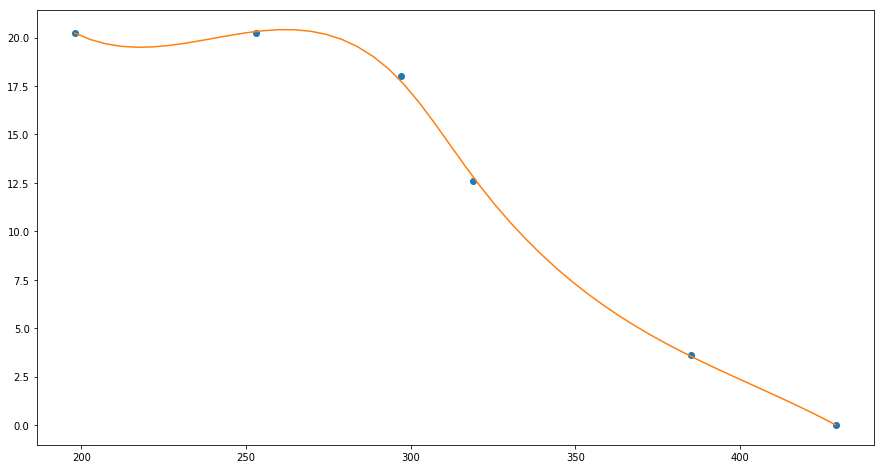

In [30]:
plt.figure(figsize=(15,8))

plt.plot(chine_dfs['c1r'].x, chine_dfs['c1r'].y, 'o')
plt.plot(chine_splines['c1r']['x'], chine_splines['c1r']['y'])

In [ ]:
np.linalg.svd()